# Objekt-orientiertes ABM
### Angewandte Systemwissenschaften I
#### Python - Wonderland

## The Schelling model

In [2]:
import random

class Move:
    def __init__(self, x, y, x_neu, y_neu):
        self.x = x
        self.y = y
        self.x_neu = x
        self.y_neu = y

class Environment:
    def __init__(self, dim, agents):
        self.dim = dim
        self.fields = [[None for y in range(dim)]
            for x in range(dim)
        ]
        for a in agents:
            x = random.choice(range(self.dim))
            y = random.choice(range(self.dim))
            self.fields[x][y] = a
     
    def get_agents(self):
        return [agent
                for ys in self.fields
                for agent in ys
                if agent != None
               ]
    
    def get_neighbors(self,x,y):
        neighbors = [self.fields[xx%self.dim][yy%self.dim]
                for xx in range(x-1,x+2)
                for yy in range(y-1,y+2)
                if xx != x or yy != y
               ]
        return [n for n in neighbors if n != None]
    
    def free_fields(self):
        return [(x,y)
                for x,ys in enumerate(self.fields)
                for y,agent in enumerate(ys)
                if agent == None
               ]
    
    def step(self):
        moves = list()
        for x, ys in enumerate(self.fields):
            for y, agent in enumerate(ys):
                if agent.wants_to_move(self.get_neighbors(x,y)):
                    x_neu,y_neu = random.choice(free_fields)
                    moves.append(Move(x,y,x_neu,y_neu))
        
        for move in moves:
            self.fields[move.x_neu][move.y_neu] = self.fields[move.x][move.y]
            self.fields[move.x][move.y] = None
                    
        
class Agent:
    def __init__(self, color, threshold):
        self.color = color
        self.threshold = threshold
        
    def wants_to_move(self, neighbors):
        ns_other = [n for n in neighbors if n.color != self.color]
        return len(ns_other) > self.threshold

In [20]:
agents = [Agent('red', 5) for _ in range(1200)] + [Agent('blue', 5) for _ in range(1200)]
env = Environment(50, agents)

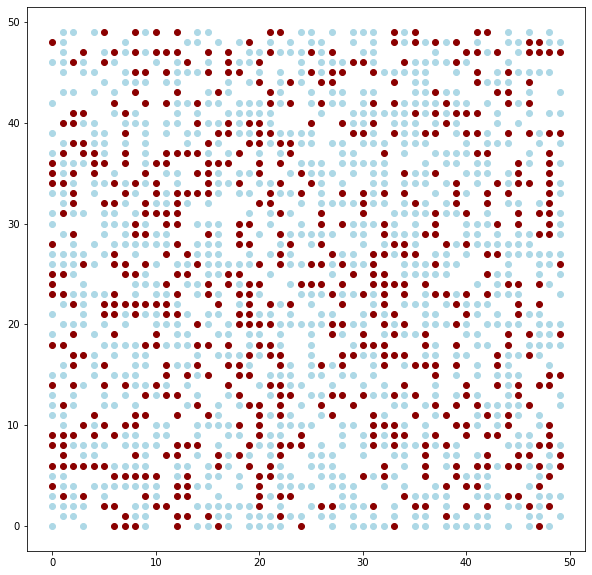

In [23]:
import matplotlib.pyplot as plt

def plot(env):
    fig,ax = plt.subplots(figsize=(10,10))
    red_agents = [(x,y)
                  for x, ys in enumerate(env.fields)
                  for y, agent in enumerate(ys)
                  if  agent != None and agent.color == 'red'
                 ]
    blue_agents = [(x,y)
                  for x, ys in enumerate(env.fields)
                  for y, agent in enumerate(ys)
                  if agent != None and agent.color == 'blue']
    ax.scatter([x for x,_ in red_agents], [y for _,y in red_agents], color='darkred')
    ax.scatter([x for x,_ in blue_agents], [y for _,y in blue_agents], color='lightblue')

plot(env)

In [1]:
import matplotlib.pyplot as plt
import random

In [50]:
class Env:
    def __init__(self, x_dim, y_dim):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.field = [[None for y in range(y_dim)] for x in range(x_dim)]
        
    def add_agents_from(self, agents):
        for agent in agents:
            self.field[agent.x][agent.y] = agent
        
    def neighbors(self, agent):
        return [self.field[x%self.x_dim][y%self.y_dim]
                for x in range(agent.x-1, agent.x+2)
                for y in range(agent.y-1, agent.y+2)
                if (x != agent.x or y != agent.y) and self.field[x%self.x_dim][y%self.y_dim] != None
               ]
    
    def free_spots(self):
        return [(x,y)
                for x,line in enumerate(self.field)
                for y,c in enumerate(line)
                if c == None
               ]
    
    def step(self):
        gen = (a for line in self.field for a in line if a != None)
        for a in gen:
            a.step(self)
               
    def move(self, agent):
        x,y = random.choice(self.free_spots())
        env.field[agent.x][agent.y] = None
        agent.x = x
        agent.y = y
        env.field[x][y] = agent

class SchellingAgent:
    def __init__(self, x, y, threshold, color):
        self.x = x
        self.y = y
        self.color = color
        self.threshold = threshold
        
    def step(self, env):
        ns = [n for n in env.neighbors(self) if n.color != self.color]
        if len(ns) > self.threshold:
            env.move(self)

In [61]:
def new_env(x_dim, y_dim, n_agents):
    env = Env(x_dim, y_dim)
    agents = [SchellingAgent(random.choice(range(x_dim))
                             , random.choice(range(y_dim))
                             , 1
                             , random.choice(['r', 'b'])
                            )
              for _ in range(n_agents)]
    env.add_agents_from(agents)
    return env, agents

def plot(agents):
    rs = [a for a in agents if a.color == 'r']
    bs = [a for a in agents if a.color == 'b']
    plt.scatter([r.x for r in rs], [r.y for r in rs], color='r')
    plt.scatter([b.x for b in bs], [b.y for b in bs], color='b')

[<__main__.SchellingAgent object at 0x7f7bf544c100>, <__main__.SchellingAgent object at 0x7f7bf54532e0>, <__main__.SchellingAgent object at 0x7f7bf5480e80>, <__main__.SchellingAgent object at 0x7f7bf5483580>, <__main__.SchellingAgent object at 0x7f7bf544ce20>, <__main__.SchellingAgent object at 0x7f7c4444b0a0>]


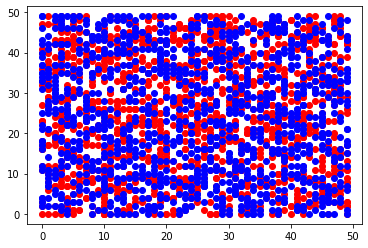

In [62]:
env, agents = new_env(50, 50, 50*50-10)
plot(agents)


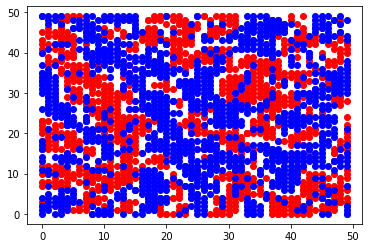

In [63]:
for _ in range(200):
    env.step()

plot(agents)